# Activity: Hypothesis testing with Python

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [1]:
# Import libraries and packages.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

data.head()



,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

## **Step 2: Data exploration** 


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

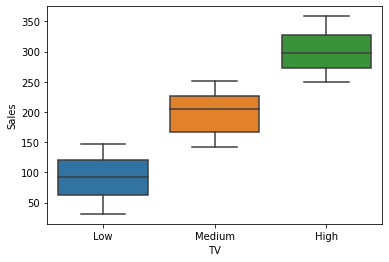

In [3]:
# Create a boxplot with TV and Sales.

sns.boxplot(x = 'TV', y = 'Sales', data = data)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `seaborn` library that creates a boxplot showing the distribution of a variable across multiple groups.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `boxplot()` function from `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `TV` as the `x` argument, `Sales` as the `y` argument, and `data` as the `data` argument.

</details>

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

There seems to be variation in Sales based off the TV promotion budget.

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

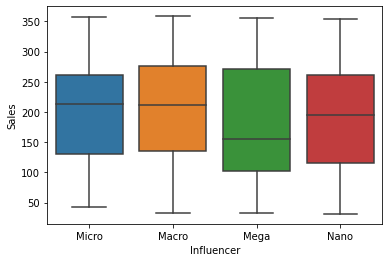

In [4]:
# Create a boxplot with Influencer and Sales.

sns.boxplot(x = 'Influencer', y = 'Sales', data = data)



**Question:** Is there variation in `Sales` based off the `Influencer` size?

There is some variation in Sales based off the Influencer size, but it isn't very significant.

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [6]:
# Drop rows that contain missing data and update the DataFrame.

data = data.dropna(axis = 0)


# Confirm the data contains no missing values.

data.isnull().sum(axis = 0)



TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Verify the data is updated properly after the rows containing missing data are dropped.

</details>

## **Step 3: Model building** 


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [16]:
#Define the OLS formula. 

ols_formula = 'Sales ~ C(Influencer)'

# Create an OLS model.

OLS = ols(formula = ols_formula, data = data)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results = model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.206
Date:                Tue, 15 Aug 2023   Prob (F-statistic):             0.0863
Time:                        21:58:00   Log-Likelihood:                -3366.0
No. Observations:                 569   AIC:                             6740.
Df Residuals:                     565   BIC:                             6757.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                206.6418      7.897     26.166      0.000     191.130     222.153
C(Influencer)[T.Mega]    -26.2567     10.841     -2.422      0.016     -47.550      -4.964
C(Influencer)[T.Micro]    -7.9867     10.876     -0.734      0.463     -29.348      13.375
C(Influencer)[T.Nano]    -16.8990     10.841     -1.559      0.120     -38.192       4.394
==============================================================================
Omnibus:                      191.779   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.590
Skew:                           0.038   Prob(JB):                     6.19e-07
Kurtosis:                       1.905   Cond. No.                         4.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to code you've written to fit linear regression models.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function from `statsmodels.formula.api`, which creates a model from a formula and DataFrame, to create an OLS model.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `C()` around the variable name in the ols formula to indicate a variable is categorical.
    
Be sure the variable string names exactly match the column names in `data`.

</details>

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

[Write your response here. Double-click (or enter) to edit.]

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


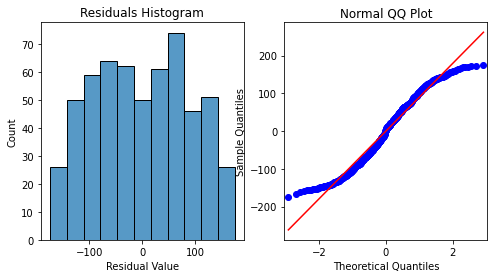

In [17]:
# Calculate the residuals.

residuals = model.resid


# Create a histogram with the residuals. 

fig, axes = plt.subplots(1, 2, figsize = (8,4))
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel('Residual Value')
axes[0].set_title("Residuals Histogram")


# Create a QQ plot of the residuals.

sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title("Normal QQ Plot")

print(axes[0])
print(axes[1])

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the QQ-plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?

Though the histogram nearly resembles a bell curve, the QQ Plot absolutely doesn't meet the normality assumption due to the fact that the plot forms an 's' with the points rather than the points following among the red line.

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

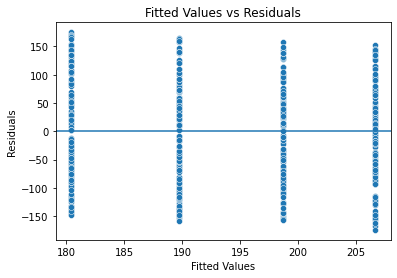

In [18]:
# Create a scatter plot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x = model.fittedvalues, y= model.resid)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values vs Residuals")


# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

plt.show()


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance (homoscedasticity) assumption met?

Since the fitted values seem similarly distributed, the homoscedasticity assumption is met.

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [19]:
# Display the model results summary.

model_results 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.206
Date:                Tue, 15 Aug 2023   Prob (F-statistic):             0.0863
Time:                        21:58:00   Log-Likelihood:                -3366.0
No. Observations:                 569   AIC:                             6740.
Df Residuals:                     565   BIC:                             6757.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                206.6418      7.897     26.166      0.000     191.130     222.153
C(Influencer)[T.Mega]    -26.2567     10.841     -2.422      0.016     -47.550      -4.964
C(Influencer)[T.Micro]    -7.9867     10.876     -0.734      0.463     -29.348      13.375
C(Influencer)[T.Nano]    -16.8990     10.841     -1.559      0.120     -38.192       4.394
==============================================================================
Omnibus:                      191.779   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.590
Skew:                           0.038   Prob(JB):                     6.19e-07
Kurtosis:                       1.905   Cond. No.                         4.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?

R-squared equals 0.012, meaning that Influencer explains 1.2% of the variation in Sales. This is significantly far away from a high percentage. 

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [20]:
# Create an one-way ANOVA table for the fit model.

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Influencer),5.366343e+04,3.0,2.206305,0.086322
Residual,4.580788e+06,565.0,NaN,NaN


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a one-way ANOVA test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in `statsmodels.api` (i.e. `sm`) that peforms an ANOVA test for a fit linear model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `anova_lm()` function from `sm.stats`. Specify the type of ANOVA test (for example, one-way or two-way), using the `typ` parameter.
   

</details>

**Question:** What are the null and alternative hypotheses for the ANOVA test?

Null: There is no difference in Sales based on the Influencer promotion budget.
Alternative: There is a difference in Sales based on the Influencer promotion budget.

**Question:** What is your conclusion from the one-way ANOVA test?

Our P-value is 0.086 which is larger than 0.05, therefore concluding that we've failed to reject the null hypothesis.

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [22]:
# Perform the Tukey's HSD post hoc test.

tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["Influencer"])
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Macro,Mega,-26.2567,0.0742,-54.1903,1.6769,False
Macro,Micro,-7.9867,0.8731,-36.0106,20.0371,False
Macro,Nano,-16.899,0.4045,-44.8326,11.0346,False
Mega,Micro,18.27,0.3074,-8.886,45.426,False
Mega,Nano,9.3577,0.7852,-17.7051,36.4206,False
Micro,Nano,-8.9122,0.8106,-36.0682,18.2437,False


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a Tukey's HSD post hoc test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pairwise_tukeyhsd()` function from `statsmodels.stats.multicomp`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `endog` argument in `pairwise_tukeyhsd` indicates which variable is being compared across groups (i.e., `Sales`). The `groups` argument in `pairwise_tukeyhsd` tells the function which variable holds the group you’re interested in reviewing.

</details>

**Question:** What is your interpretation of the Tukey HSD test?

The Tukey HSD tests furhter explains how we cannot reject the null hypothesis since there is a significant difference between Influencer and Sales

#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.